In [14]:
%reload_ext autoreload
%autoreload 2

import fish_models

name = "GRU_with_conv_15fov"
models_path = "../buffer/models"
eval_path = f"../buffer/evaluation/{name}"
tracks_path = f"{eval_path}/tracks"
model = fish_models.ModelStorage.load(f"{models_path}/{name}.zip")

#Create tracks of the model
n_tracks = 5
n_timesteps = 8990

In [15]:
for i in range(n_tracks):
    generator = fish_models.TrackGeneratorGym(model)
    track = generator.create_track(2,n_timesteps)
    generator.as_io_file(track).save_as(f"{tracks_path}/generated_{i}.hdf5", no_warning=True)

100%|██████████| 8989/8989 [00:08<00:00, 1035.02it/s]


follow_iid: 100%|██████████| 9/9 [01:29<00:00,  9.97s/it]


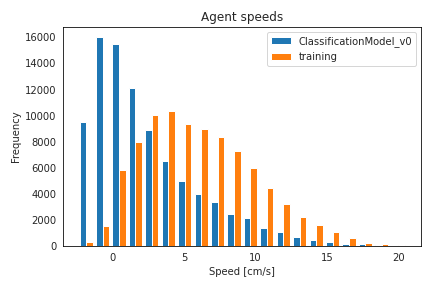

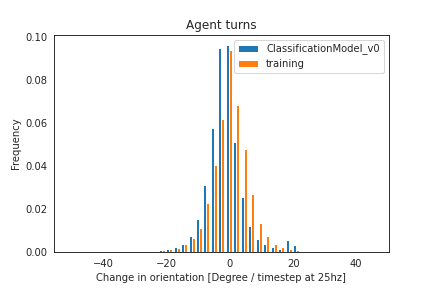

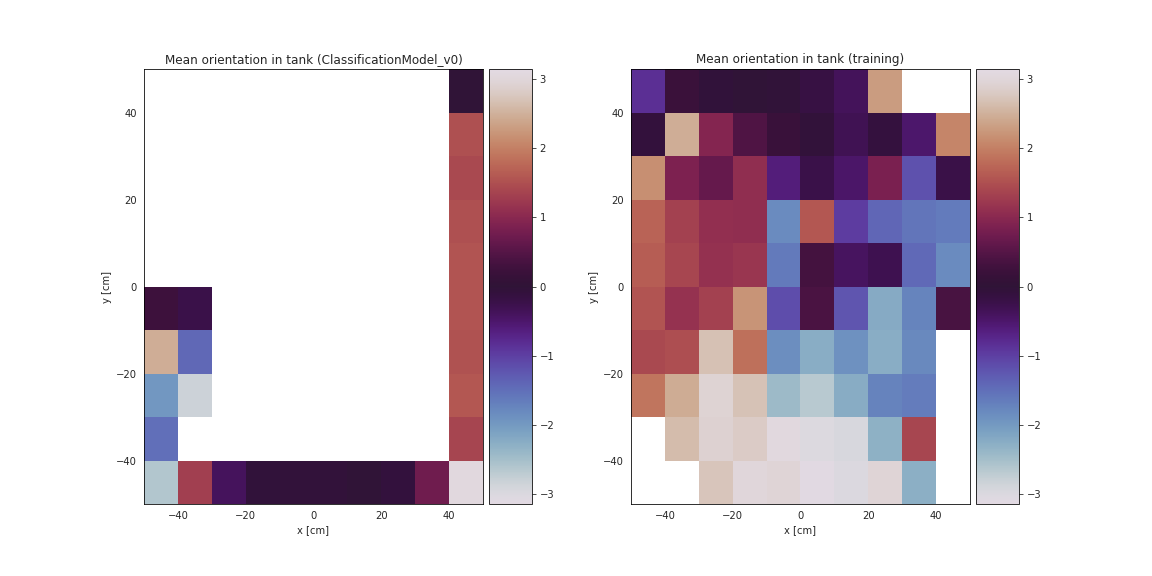

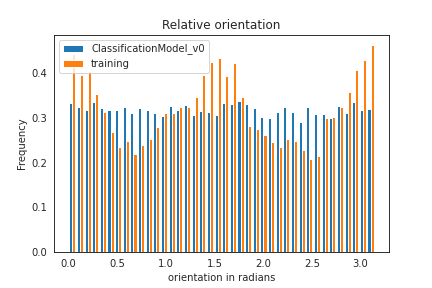

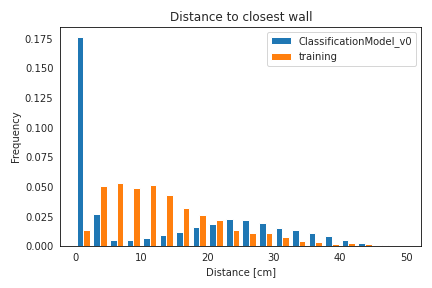

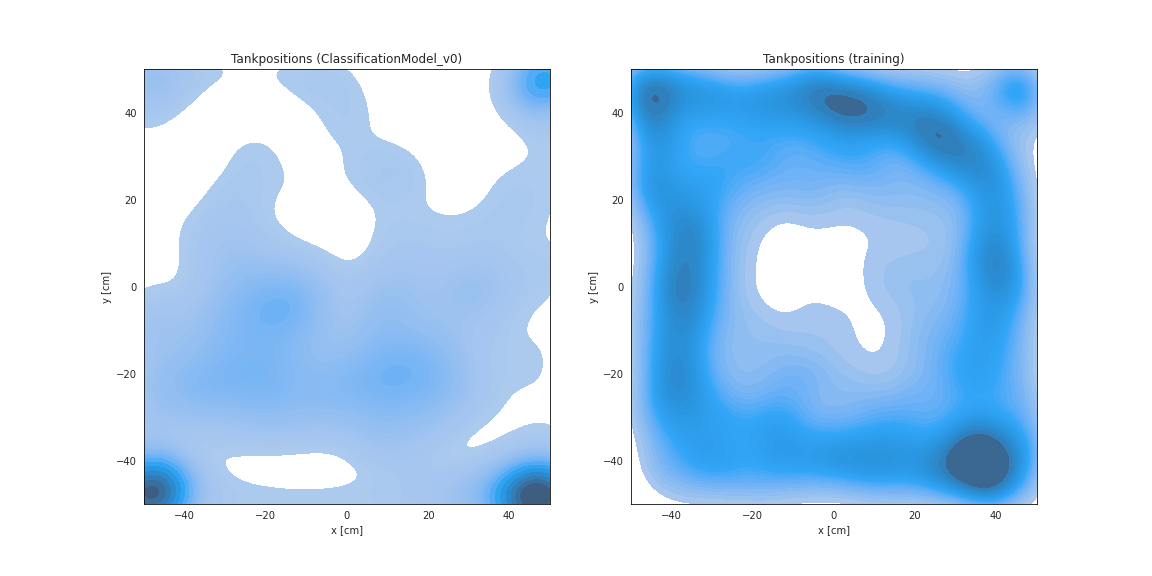

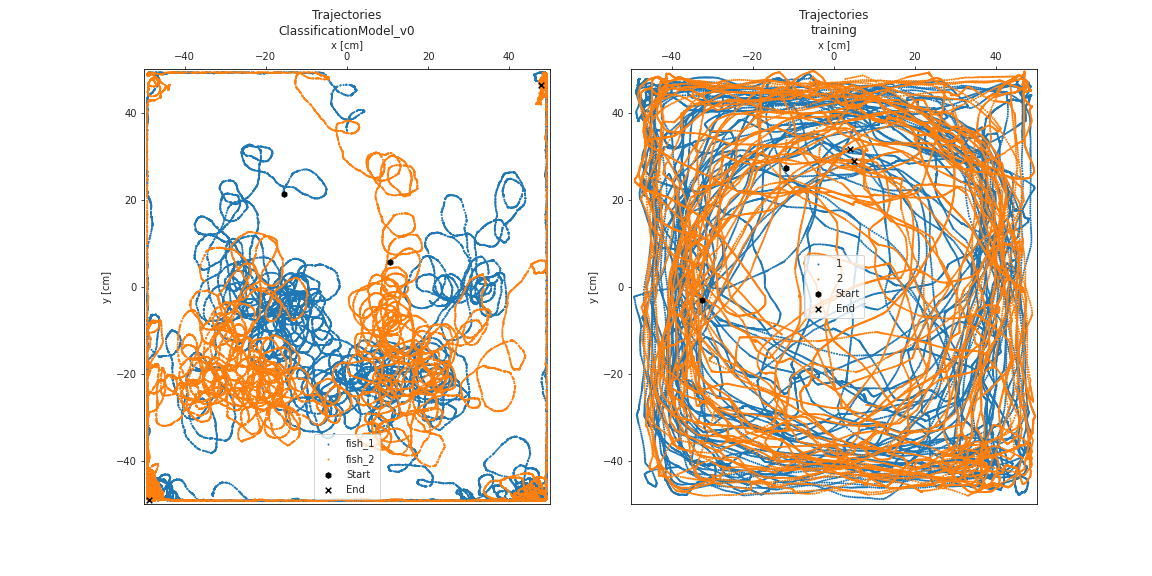

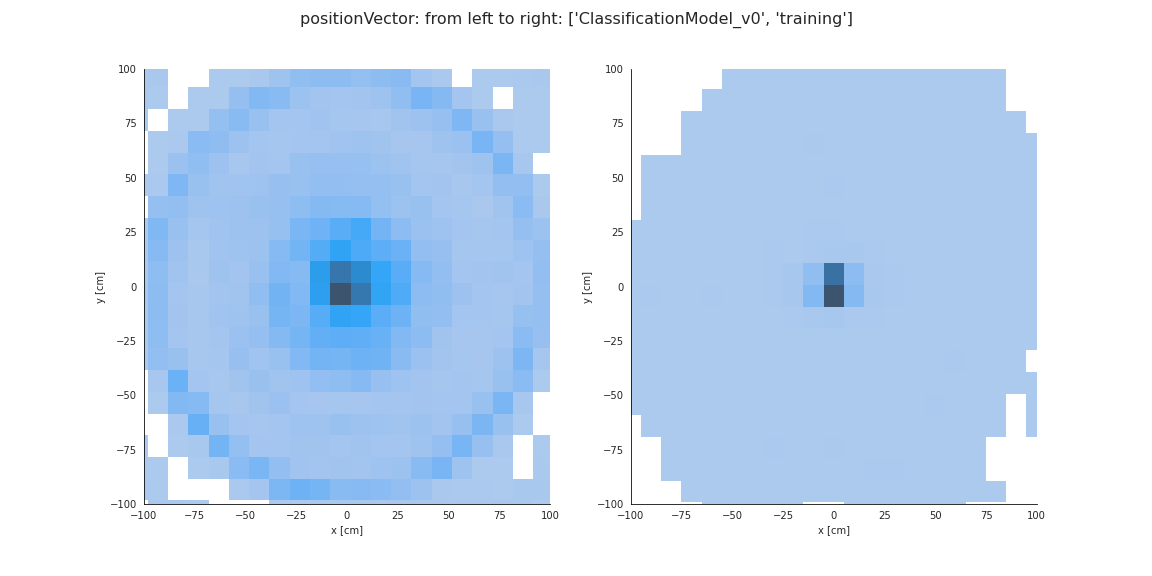

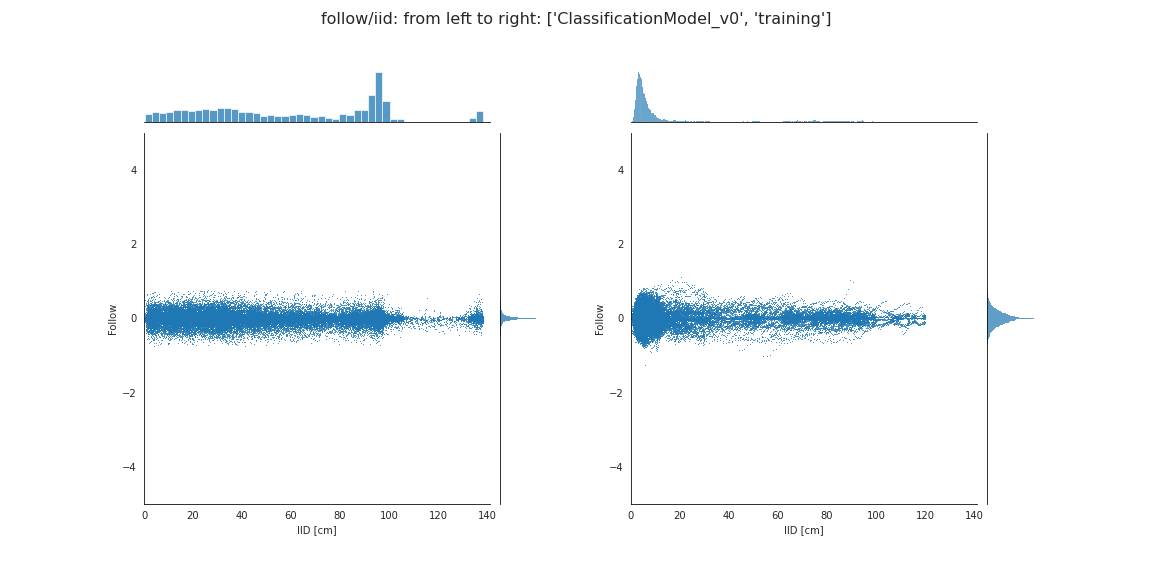

In [16]:
%reload_ext autoreload
%autoreload 2

import fish_models
import robofish.evaluate
from pathlib import Path
from IPython.display import Image, display


paths = robofish.evaluate.evaluate_all(paths = [tracks_path, fish_models.live_female_female_data() / "validation"], labels=[name, "training"], save_folder = Path(eval_path))

for im in paths:
    display(Image(filename=im))    